In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import pickle
from google.colab import files

# Unggah file CSV
#uploaded = files.upload()

#df = pd.read_csv('https://github.com/IlhamBerlianO/Capstone-Project---FitChange/blob/main/Dataset%20Capstone%20Fixx.csv?raw=true', sep=',')
#df

Saving datasetfix.csv to datasetfix.csv


In [ ]:
df = pd.read_csv('datasetfix.csv', decimal='.')

In [ ]:
df.head()

,class,age,weight(kg),height(m),gender,BMI,BMR,calories_to_maintain_weight,eat,food,calories_a,"Activity, Exercise or Sport (1 hour)",Calories (per kg)
0,underweight,16,47.799550,1.614325,F,18.341805,1313.111,2494.9109,breakfast,"Susu bubuk, Spaghetti",652,"Walking, pushing a wheelchair",0.823236
1,underweight,16,47.799550,1.614325,F,18.341805,1313.111,2494.9109,lunch,"Nasi Jagung Empal Goreng, Ketimun, Yoghurt, Pi...",1138,Painting,0.927494
2,underweight,16,47.897244,1.614810,M,18.368239,1420.797,1704.9564,breakfast,"Roti Putih, Susu Kental Manis, Apel",642,Skateboarding,1.029722
3,normal,16,47.629479,1.601502,F,18.570391,1309.298,1571.1576,lunch,"Nasi Rames, Tahu Goreng, Tekwan, Srikaya",424,"Cleaning, dusting",0.515199
4,normal,16,47.969780,1.602348,M,18.683331,1415.560,1840.2280,breakfast,"Susu bubuk, melon",550,"Swimming leisurely, not laps",1.234853


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   class                                 58 non-null     object 
 1   age                                   58 non-null     int64  
 2   weight(kg)                            58 non-null     float64
 3   height(m)                             58 non-null     float64
 4   gender                                58 non-null     object 
 5   BMI                                   58 non-null     float64
 6   BMR                                   58 non-null     float64
 7   calories_to_maintain_weight           58 non-null     float64
 8   eat                                   58 non-null     object 
 9   food                                  58 non-null     object 
 10  calories_a                            58 non-null     int64  
 11  Activity, Exercise or

In [ ]:
df.describe()

,age,weight(kg),height(m),BMI,BMR,calories_to_maintain_weight,calories_a,Calories (per kg)
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,37.344828,65.962921,1.619056,25.075131,1464.256138,2165.130453,739.793103,17.413381
std,31.643048,20.479346,0.014029,7.457181,90.252349,444.974499,276.128292,14.319171
min,16.000000,47.629479,1.589298,18.341805,1309.298000,1571.157600,323.000000,0.515199
25%,16.000000,50.564339,1.609484,19.561872,1410.781750,1751.481600,555.250000,2.816704
50%,16.500000,54.193698,1.621329,21.025032,1459.568000,2099.518200,655.000000,15.427494
75%,84.750000,95.797134,1.631864,35.984595,1523.065750,2504.810600,997.500000,29.677494
max,90.000000,98.755711,1.633164,37.075757,1635.401000,2946.782200,1487.000000,43.927494


In [ ]:
df.isnull()

,class,age,weight(kg),height(m),gender,BMI,BMR,calories_to_maintain_weight,eat,food,calories_a,"Activity, Exercise or Sport (1 hour)",Calories (per kg)
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


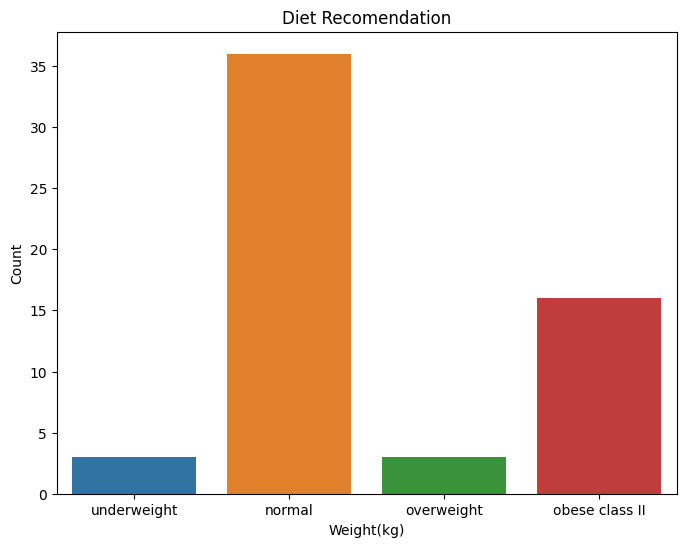

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df)
plt.title('Diet Recomendation')
plt.xlabel('Weight(kg)')
plt.ylabel('Count')
plt.show()

In [ ]:
#def model_fitchange():
X = df.drop(['class', "food", "eat", "Activity, Exercise or Sport (1 hour)", "calories_a", "Calories (per kg)"], axis='columns')
y = df['class']
X

,age,weight(kg),height(m),gender,BMI,BMR,calories_to_maintain_weight
0,16,47.799550,1.614325,F,18.341805,1313.111,2494.9109
1,16,47.799550,1.614325,F,18.341805,1313.111,2494.9109
2,16,47.897244,1.614810,M,18.368239,1420.797,1704.9564
3,16,47.629479,1.601502,F,18.570391,1309.298,1571.1576
4,16,47.969780,1.602348,M,18.683331,1415.560,1840.2280
5,16,47.678150,1.592027,M,18.811299,1406.404,1828.3252
6,16,48.665846,1.606843,M,18.848525,1427.344,2426.4848
7,17,48.955672,1.607656,F,18.941595,1318.376,1582.0512
8,16,47.981040,1.589298,M,18.995870,1409.189,2395.6213
9,16,49.842099,1.614895,M,19.112074,1447.484,2750.2196


In [ ]:
X = pd.get_dummies(X)

In [ ]:
X

,age,weight(kg),height(m),BMI,BMR,calories_to_maintain_weight,gender_F,gender_M
0,16,47.799550,1.614325,18.341805,1313.111,2494.9109,1,0
1,16,47.799550,1.614325,18.341805,1313.111,2494.9109,1,0
2,16,47.897244,1.614810,18.368239,1420.797,1704.9564,0,1
3,16,47.629479,1.601502,18.570391,1309.298,1571.1576,1,0
4,16,47.969780,1.602348,18.683331,1415.560,1840.2280,0,1
5,16,47.678150,1.592027,18.811299,1406.404,1828.3252,0,1
6,16,48.665846,1.606843,18.848525,1427.344,2426.4848,0,1
7,17,48.955672,1.607656,18.941595,1318.376,1582.0512,1,0
8,16,47.981040,1.589298,18.995870,1409.189,2395.6213,0,1
9,16,49.842099,1.614895,19.112074,1447.484,2750.2196,0,1


In [ ]:
X.columns

Index(['age', 'weight(kg)', 'height(m)', 'BMI', 'BMR',
       'calories_to_maintain_weight', 'gender_F', 'gender_M'],
      dtype='object')

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          58 non-null     int64  
 1   weight(kg)                   58 non-null     float64
 2   height(m)                    58 non-null     float64
 3   BMI                          58 non-null     float64
 4   BMR                          58 non-null     float64
 5   calories_to_maintain_weight  58 non-null     float64
 6   gender_F                     58 non-null     uint8  
 7   gender_M                     58 non-null     uint8  
dtypes: float64(5), int64(1), uint8(2)
memory usage: 3.0 KB


In [ ]:
label_encoder = LabelEncoder() #merubah string menjadi numerik
y = label_encoder.fit_transform(y)
y

array([3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
print("-------------------------------------------------------------------------")
print(f"The accuraccy score is: ------>>  {accuracy_score(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> {classification_report(y_test,y_pred)}")

-------------------------------------------------------------------------
The accuraccy score is: ------>>  0.9166666666666666
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[7 0 0]
 [0 4 0]
 [1 0 0]]
-------------------------------------------------------------------------
The Classification Report is: ---->>               precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         1

    accuracy                           0.92        12
   macro avg       0.62      0.67      0.64        12
weighted avg       0.84      0.92      0.88        12



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# !pip install np_utils
from keras.utils import to_categorical
y_train_ann = to_categorical(y_train)
y_train_ann

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],


In [ ]:
y_test_ann = to_categorical(y_test)

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=8,activation="relu"))
ann.add(tf.keras.layers.Dense(units=8,activation="relu"))
ann.add(tf.keras.layers.Dense(units=4,activation="softmax"))
ann.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
ann.fit(X_train,y_train_ann,batch_size=32,epochs=350)

Epoch 1/350
2/2 [==============================] - 1s 9ms/step - loss: 22.8479 - accuracy: 0.3261
Epoch 2/350
2/2 [==============================] - 0s 7ms/step - loss: 19.4033 - accuracy: 0.3913
Epoch 3/350
2/2 [==============================] - 0s 7ms/step - loss: 20.1727 - accuracy: 0.6304
Epoch 4/350
2/2 [==============================] - 0s 10ms/step - loss: 17.7288 - accuracy: 0.4130
Epoch 5/350
2/2 [==============================] - 0s 9ms/step - loss: 19.6583 - accuracy: 0.1522
Epoch 6/350
2/2 [==============================] - 0s 9ms/step - loss: 18.8659 - accuracy: 0.1957
Epoch 7/350
2/2 [==============================] - 0s 7ms/step - loss: 17.0666 - accuracy: 0.3043
Epoch 8/350
2/2 [==============================] - 0s 7ms/step - loss: 17.9180 - accuracy: 0.5870
Epoch 9/350
2/2 [==============================] - 0s 7ms/step - loss: 17.1496 - accuracy: 0.4348
Epoch 10/350
2/2 [==============================] - 0s 7ms/step - loss: 16.2154 - accuracy: 0.3696
Epoch 11/350
2/2 [

In [ ]:
# model = keras.Sequential()
# model.add(layers.Input(shape=(8,)))

# # model.add(layers.Dense(10, activation='relu'))

# model.add(layers.Dense(4, activation='relu'))

# model.add(layers.Dense(1, activation='sigmoid'))

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# history = model.fit(X_train, y_train, epochs=200)


In [ ]:
#test_loss, test_accuracy = model.evaluate(X_test, y_test)
#print(f'Test Accuracy: {test_accuracy}')
#print(f'Test Loss: {test_loss}')

In [ ]:
# save the model
filename = 'model_diet.h5'
pickle.dump(ann, open(filename, 'wb'))

In [ ]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()